<a href="https://colab.research.google.com/github/Jeremy-22/Tarea-6/blob/main/Funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Activation,  BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [34]:
class SolOD(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = 200
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            eq = y_pred - 3.*tf.sin(math.pi*x)

            loss = self.mse(0.,eq)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

Model: "sol_od_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 100)               200       
                                                                 
 dense_77 (Dense)            (None, 10)                1010      
                                                                 
 dense_78 (Dense)            (None, 10)                110       
                                                                 
 dense_79 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


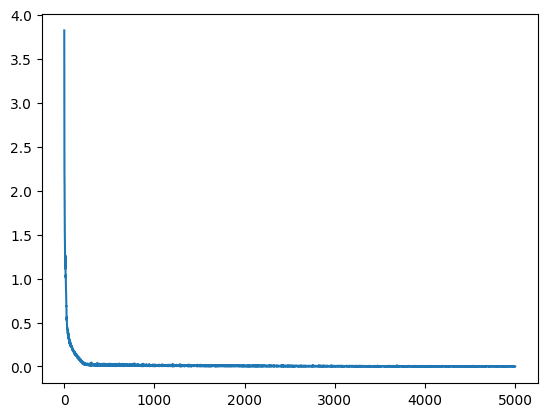

In [47]:
model = SolOD()

model.add(Dense(100,activation ='tanh', input_shape=(1,)))
model.add(Dense(10, activation ='tanh'))
model.add(Dense(10, activation ='tanh'))
model.add(Dense(1))

model.summary()

model.compile(optimizer=RMSprop(),metrics=['loss'])

x=tf.linspace(-1,1,100)
history = model.fit(x,epochs=5000,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


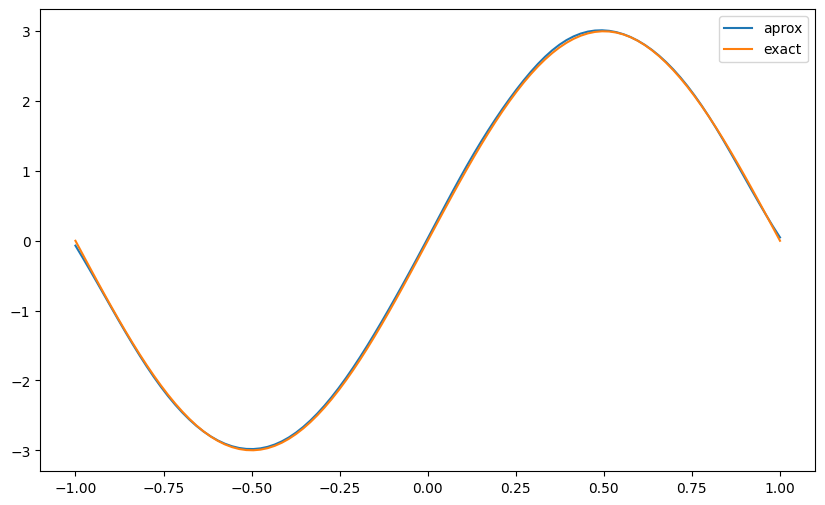

In [48]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.figure(figsize=(10,6))
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,3*np.sin(np.pi*x),label="exact")
plt.legend()
plt.show()

In [50]:
class SolODa(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = 200
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            eq = y_pred - 1-2*x-4*x**3

            loss = self.mse(0.,eq)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

Model: "sol_o_da_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 100)               200       
                                                                 
 dense_85 (Dense)            (None, 10)                1010      
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
 dense_87 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


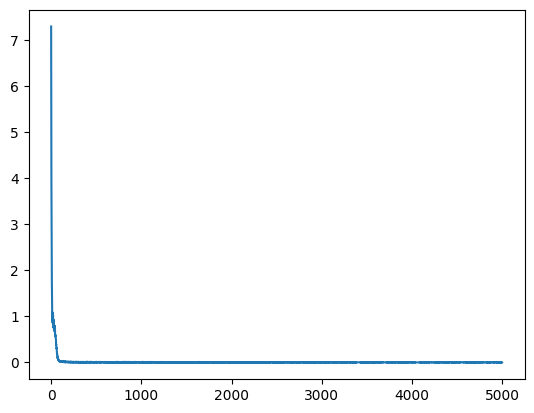

In [55]:

modela = SolODa()

modela.add(Dense(100,activation ='tanh', input_shape=(1,)))
modela.add(Dense(10, activation ='tanh'))
modela.add(Dense(10, activation ='tanh'))
modela.add(Dense(1))

modela.summary()

modela.compile(optimizer=RMSprop(),metrics=['loss'])

x=tf.linspace(-1,1,100)
history = modela.fit(x,epochs=5000,verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


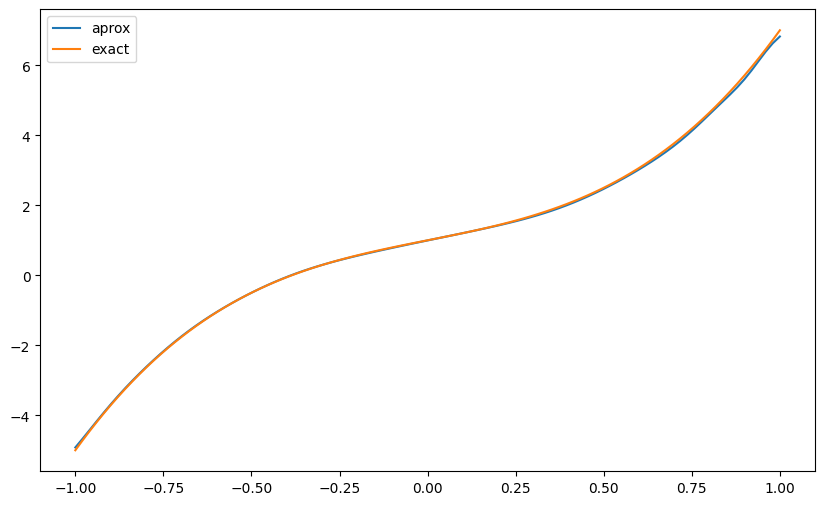

In [56]:
x_testv = tf.linspace(-1,1,100)
a=modela.predict(x_testv)
plt.figure(figsize=(10,6))
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,1+2*x+4*x**3,label="exact")
plt.legend()
plt.show()